# Ejemplo t-SNE Iris Dataset

## Inicializamos las librerías

In [1]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px


### Librerías de sklearn para este problema

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

## Cargamos el dataset Iris

In [3]:
iris = datasets.load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

#### Iris viene como un diccionario, por lo que vamos a extraer la información que nos interesa para montar nuestro dataset

In [5]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [6]:
df["target_cat"] = np.where(df["target"] == 0, "setosa",np.where(df["target"] == 1, "versicolor","virginica"))

## t-SNE

### Normalizamos los datos

In [7]:
scaler = StandardScaler()

In [8]:
df_norm = df.copy()

In [9]:
df_norm[iris["feature_names"]] = scaler.fit_transform(df_norm[iris["feature_names"]])

In [10]:
df_norm.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

   target target_cat  
0     0.0     setosa  
1     0.0     setosa  
2     0.0     setosa  
3     0.0     setosa  
4     0.0     setosa

### Reducimos a dos dimensiones

In [11]:
tsne = TSNE(n_components = 2, random_state=42, n_iter=5000)

In [12]:
tsne_2 = tsne.fit_transform(df_norm[iris["feature_names"]])

In [13]:
df_tsne = pd.DataFrame({"x":tsne_2[:,0], "y":tsne_2[:,1], "target": df_norm["target"], "target_cat": df_norm["target_cat"]})

In [14]:
df_tsne.head()

x         y  target target_cat
0 -27.300896  0.332114     0.0     setosa
1 -23.508730  0.839547     0.0     setosa
2 -24.572601 -0.128299     0.0     setosa
3 -23.802259 -0.215372     0.0     setosa
4 -27.814468 -0.212746     0.0     setosa

Text(0, 0.5, 'y')

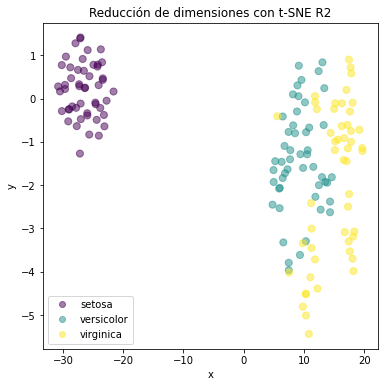

In [16]:
fig = plt.figure(figsize = (6,6))
plt.axis("on")
plt.clf()
scatter = plt.scatter(df_tsne["x"], df_tsne["y"], marker = "o", s = 50, c = df_tsne["target"].tolist(), alpha = 0.5, cmap = "viridis")
plt.legend(handles=scatter.legend_elements()[0], labels=df_tsne.target_cat.unique().tolist())
plt.title("Reducción de dimensiones con t-SNE R2")
plt.xlabel("x")
plt.ylabel("y")

### Repetimos el proceso pero reducimos ahora a tres dimensiones

In [17]:
tsne = TSNE(n_components = 3, random_state=42, n_iter=5000)

In [18]:
tsne_3 = tsne.fit_transform(df_norm[iris["feature_names"]])

In [23]:
df_tsne = pd.DataFrame({"x":tsne_3[:,0], "y":tsne_3[:,1], "z":tsne_3[:,2], "target": df_norm["target"], "target_cat": df_norm["target_cat"]})

In [24]:
df_tsne.head()

x           y           z  target target_cat
0 -128.235321  384.220673   32.267994     0.0     setosa
1 -113.677078  278.848053  391.159088     0.0     setosa
2 -176.010208  138.750290  211.114273     0.0     setosa
3 -395.179901  157.548172  203.448669     0.0     setosa
4 -205.675095  378.978699  -75.883202     0.0     setosa

/var/folders/jm/_cqzmbbs0jv4bdms06q4tfdh0000gn/T/ipykernel_16776/2510772663.py:4: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.



Text(0.5, 0, 'z')

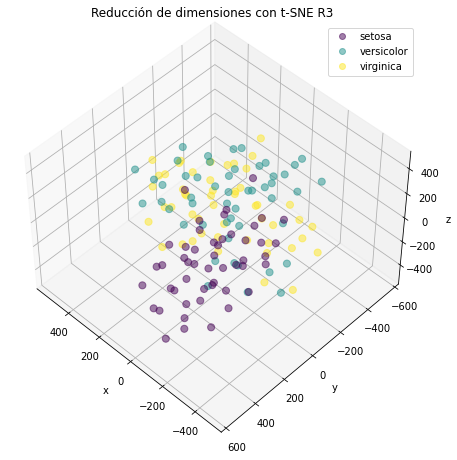

In [25]:
fig = plt.figure(figsize = (6,6))
plt.axis("on")
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
scatter = ax.scatter3D(df_tsne["x"], df_tsne["y"], df_tsne["z"], marker = "o", s = 50, c = df_tsne["target"].tolist(), alpha = 0.5, cmap = "viridis")
plt.legend(handles=scatter.legend_elements()[0], labels=df_tsne.target_cat.unique().tolist())
ax.set_title("Reducción de dimensiones con t-SNE R3")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")


In [26]:
fig = plt.figure(figsize = (15,15))
fig = px.scatter_3d(x = df_tsne["x"], y = df_tsne["y"], z = df_tsne["z"], color=df_tsne["target_cat"])
fig.update_layout(title='Primeras tres componentes que maximizan la ganancia', autosize=False,
#                  x_label = "1er autovector pc1",
#                  ylabel = "2º autovector pc1",
#                  zlabel = "3er autovector pc1",
                  width=800, height=800,
                  showlegend= True,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

<Figure size 1080x1080 with 0 Axes>